In [1]:
#Data preprocessing
import statsbomb as sb
import pandas as pd
import numpy as np

#Hide SettingWithCopy warning
pd.options.mode.chained_assignment = None

#Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
import scikitplot as skplt
import plotly.express as px

#Machine Learning toolit
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import RFE
#from imblearn.over_sampling import SMOTE, SMOTENC
import imblearn
from collections import Counter

In [2]:
#Get a list of available competitions
comps = sb.Competitions()

#Get underlying json data
json_data = comps.data

#Convert to a dataframe
df = comps.get_dataframe()
df

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,37,42,England,FA Women's Super League,female,2019/2020,2020-03-11T14:09:41.932138,2020-03-11T14:09:41.932138
1,37,4,England,FA Women's Super League,female,2018/2019,2020-02-27T15:59:58.148,2020-02-27T15:59:58.148
2,43,3,International,FIFA World Cup,male,2018,2020-03-23T20:46:14.281663,2019-12-16T23:09:16.168756
3,11,4,Spain,La Liga,male,2018/2019,2020-02-27T12:19:39.458017,2020-02-27T12:19:39.458017
4,11,1,Spain,La Liga,male,2017/2018,2020-02-27T12:19:39.458017,2020-02-27T12:19:39.458017
5,11,2,Spain,La Liga,male,2016/2017,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
6,11,27,Spain,La Liga,male,2015/2016,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
7,11,26,Spain,La Liga,male,2014/2015,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
8,11,25,Spain,La Liga,male,2013/2014,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
9,11,24,Spain,La Liga,male,2012/2013,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756


In [3]:
#Get all FA WSL (England Women's league) matches
fawsl_matches = sb.Matches(event_id='37', season_id='4').get_dataframe()
fawsl_matches_2 = sb.Matches(event_id='37', season_id='42').get_dataframe()

#Get all NWSL (US Women's league) matches
nwsl_matches = sb.Matches(event_id='49', season_id='3').get_dataframe()

#Combine into single dataframe
inter = fawsl_matches.append(fawsl_matches_2)
matches = inter.append(nwsl_matches)
#matches.head()

In [4]:
#Create a list of all Match IDs
match_list = matches['match_id'].to_list()
match_list = map(str, match_list)

#Create a blank dataframe for all shot events
shots_df = pd.DataFrame()

#Loop through the events db and pull out all shot events for each match
for i in match_list:
    events = sb.Events(event_id=i)
    df = events.get_dataframe(event_type='shot')
    shots_df = shots_df.append(df)
    
#shots_df.head()

In [5]:
# Print some details about the dataset
print(len(shots_df), "shots is not a huge sample to work with! (actually not bad with this larger dataset)")
print("")
 
print("The dataset contains the following columns:")
print(list(shots_df))
print("")
 
print("Unique values in the 'type' column:")
print(shots_df['type'].unique())
print("")
 
print("Unique values in the 'play_pattern' column:")
print(shots_df['play_pattern'].unique())

6116 shots is not a huge sample to work with! (actually not bad with this larger dataset)

The dataset contains the following columns:
['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'possession_team', 'play_pattern', 'off_camera', 'team', 'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg', 'key_pass_id', 'body_part', 'type', 'outcome', 'technique', 'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'start_location_x', 'start_location_y', 'end_location_x', 'end_location_y', 'end_location_z']

Unique values in the 'type' column:
['Open Play' 'Penalty' 'Free Kick' 'Corner']

Unique values in the 'play_pattern' column:
['Regular Play' 'From Corner' 'From Throw In' 'From Free Kick'
 'From Counter' 'From Goal Kick' 'From Kick Off' 'Other' 'From Keeper']


In [6]:
len(shots_df[shots_df['type'] == 'Open Play'])

5870

Average conversion rate:  10.48%


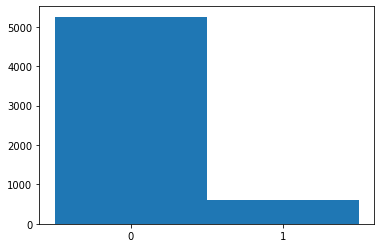

In [7]:
#Filter down to only Open Play shots (96% of full dataset)
op_shots = shots_df[shots_df['type'] == 'Open Play']

#Create a goal column, where 1 = goal and 0 = no goal
op_shots['goal'] = np.where(op_shots['outcome'] == 'Goal', 1, 0)
op_shots['pressure'] = np.where(op_shots['under_pressure'] == True, 1, 0)

#Calculate average shot ocnversion rate
attempts = len(op_shots)
goals = sum(op_shots['goal'])
misses = attempts - goals
conversion_rate = goals / attempts
print('Average conversion rate: ', '{0:.2f}%'.format(conversion_rate*100))

feature = 'goal'
size = len(op_shots[feature].unique())
#Plot the count of 'goal' and 'no goal' events to show imbalance
plt.hist(op_shots[feature], bins=np.arange(size+1) - 0.5)
plt.xticks(range(size))
plt.show()

In [8]:
print(op_shots['play_pattern'].unique())
print(op_shots['position'].unique())
print(op_shots['under_pressure'].unique())
print(op_shots['body_part'].unique())
print(op_shots['technique'].unique())
print(op_shots['first_time'].unique())
print(op_shots['follows_dribble'].unique())
print(op_shots['redirect'].unique())
print(op_shots['deflected'].unique())
print(op_shots['one_on_one'].unique())
print(op_shots['open_goal'].unique())

['Regular Play' 'From Corner' 'From Throw In' 'From Free Kick'
 'From Counter' 'From Goal Kick' 'From Kick Off' 'From Keeper' 'Other']
['Right Midfield' 'Left Center Midfield' 'Left Back' 'Center Forward'
 'Center Defensive Midfield' 'Center Attacking Midfield' 'Right Wing'
 'Right Center Midfield' 'Left Center Back' 'Left Midfield'
 'Right Wing Back' 'Left Defensive Midfield' 'Right Defensive Midfield'
 'Left Wing' 'Right Center Forward' 'Left Center Forward'
 'Right Center Back' 'Right Back' 'Left Wing Back' 'Center Back'
 'Center Midfield' 'Left Attacking Midfield' 'Right Attacking Midfield'
 'Secondary Striker' 'Goalkeeper']
[None True]
['Right Foot' 'Head' 'Left Foot' 'Other']
['Normal' 'Volley' 'Half Volley' 'Lob' 'Backheel' 'Overhead Kick'
 'Diving Header']
[None True]
[None True]
[None True]
[None True]
[None True]
[None True]


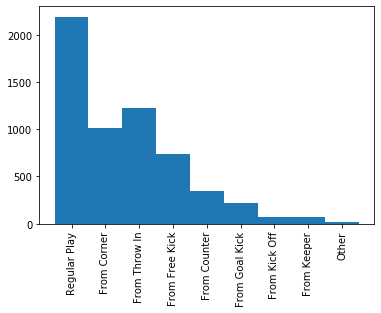

In [9]:
feature = 'play_pattern'
size = len(op_shots[feature].unique())
#Plot the count of 'goal' and 'no goal' events to show imbalance
plt.hist(op_shots[feature], bins=np.arange(size+1) - 0.5)
plt.xticks(range(size))
plt.xticks(rotation='vertical')
plt.show()

In [10]:
#Filter down to only Open Play shots (96% of full dataset)
op_shots = shots_df[shots_df['type'] == 'Open Play']

#Create a goal column, where 1 = goal and 0 = no goal
op_shots['goal'] = np.where(op_shots['outcome'] == 'Goal', 1, 0)
#op_shots['pressure'] = np.where(op_shots['under_pressure'] == True, 1, 0)
#op_shots['firsttime'] = np.where(op_shots['first_time'] == True, 1, 0)
#op_shots['dribble'] = np.where(op_shots['follows_dribble'] == True, 1, 0)
#op_shots['redirect'] = np.where(op_shots['redirect'] == True, 1, 0)
#op_shots['deflected'] = np.where(op_shots['deflected'] == True, 1, 0)
#op_shots['one_on_one'] = np.where(op_shots['one_on_one'] == True, 1, 0)
#op_shots['open_goal'] = np.where(op_shots['open_goal'] == True, 1, 0)

#Feature engineering
#Reset index
op_shots = op_shots.reset_index().drop('level_0', axis=1)

#Create a column to show whether or not the shot was assisted
op_shots['assisted'] = np.where(op_shots['key_pass_id'].isna(), 0, 1)

#Create columns for distance and angle
#In this dataset, the pitch is 120 units long and 80 units wide
#We will measure distance and angle from the centre of the goal at (120, 40)
op_shots['x_dist'] = 120 - op_shots['start_location_x']
op_shots['y_dist'] = abs(40 - op_shots['start_location_y'])
op_shots['dist'] = np.sqrt((op_shots['x_dist']**2 + op_shots['y_dist']**2))
op_shots['angle'] = np.degrees(np.arctan((op_shots['y_dist'] / op_shots['x_dist'])))

#We would only want to differentiate between left and right foot if we
#already knew the player's weak foot
op_shots['body_part'] = np.where((op_shots['body_part'] == 'Right Foot')
                                 | (op_shots['body_part'] == 'Left Foot'), 'foot',
                                np.where(op_shots['body_part'] == 'Head', 'head', 'other'))

#Let's group Technique into Normal, Volley, Other
op_shots['technique'] = np.where((op_shots['technique'] == 'Volley')
                                | (op_shots['technique'] == 'Half Volley'), 'volley',
                                np.where((op_shots['technique'] == 'Lob')
                                         |(op_shots['technique'] == 'Backheel')
                                         |(op_shots['technique'] == 'Overhead Kick')
                                         |(op_shots['technique'] == 'Diving Header'), 'other', 'normal'))

#Simplify positions into 'family groups' based on Central or Wide positions and Depth
op_shots['position'] = np.where((op_shots['position'] == 'Right Midfield')
                                | (op_shots['position'] == 'Right Wing')
                                | (op_shots['position'] == 'Left Midfield')
                                | (op_shots['position'] == 'Left Wing'), 'W',
                                np.where((op_shots['position'] == 'Left Center Midfield')
                                         |(op_shots['position'] == 'Center Midfield')
                                         |(op_shots['position'] == 'Right Center Midfield'), 'CM',
                                         np.where((op_shots['position'] == 'Left Attacking Midfield')
                                             |(op_shots['position'] == 'Center Attacking Midfield')
                                             |(op_shots['position'] == 'Right Attacking Midfield'), 'AM',
                                             np.where((op_shots['position'] == 'Left Defensive Midfield')
                                                 |(op_shots['position'] == 'Center Defensive Midfield')
                                                 |(op_shots['position'] == 'Right Defensive Midfield'), 'DM',
                                                 np.where((op_shots['position'] == 'Left Center Forward')
                                                     |(op_shots['position'] == 'Center Forward')
                                                     |(op_shots['position'] == 'Secondary Striker')
                                                     |(op_shots['position'] == 'Right Center Forward'), 'CF',
                                                     np.where((op_shots['position'] == 'Left Back')
                                                         |(op_shots['position'] == 'Left Wing Back')
                                                         |(op_shots['position'] == 'Right Back')
                                                         |(op_shots['position'] == 'Right Wing Back'), 'FB',
                                                         np.where((op_shots['position'] == 'Left Center Back')
                                                             |(op_shots['position'] == 'Center Back')
                                                             |(op_shots['position'] == 'Right Center Back'), 'CB',
                                                             'GK')))))))

In [11]:
#Select model features and labels
feature_cols = ['play_pattern',
                'position',
                'under_pressure',
                'body_part',
                'technique',
                'first_time',
                'follows_dribble',
                'redirect',
                'deflected',
                'one_on_one',
                'open_goal',
                'assisted',
                'dist',
                'angle']

#Point out feature cols which are already numeric and don't need to be encoded
numeric_cols = ['assisted', 'dist', 'angle']

features = op_shots[feature_cols]
labels = op_shots['goal']

#Fill missing values
features = features.fillna(0)
labels = labels.fillna(0)

#Encode categorical features
cat_cols = [s for s in feature_cols if s not in numeric_cols]
cat_features = features[cat_cols]
features = features.drop(cat_cols, axis=1)

#Use label encoding to convert categorical features to numeric
le = preprocessing.LabelEncoder()
cat_features = cat_features.apply(le.fit_transform)

#Merge numerically encoded features with pre-existing numeric features
features = features.merge(cat_features, left_index=True, right_index=True)


In [12]:
#Split data into a training set and a test set
#Going with and 80-20 split here
#Setting shuffle=True re-orders the dataset randomly
#Using the same random_state for each model ensures that we can compare 
# different models accurately
#X is our model features, and y is our labels (naming convention)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, 
                                                   shuffle=True, random_state=42)
#Scale X to be between 0 and 1
#Note that y is already either 0 or 1, so can leave alone
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)

(4696, 14)
(1174, 14)


Predicted goals (test set):  111
Sum of predicted goal probabilities (aka xG):  112.00
Actual goals (test set):  137

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1037
           1       0.30      0.24      0.27       137

    accuracy                           0.84      1174
   macro avg       0.60      0.58      0.59      1174
weighted avg       0.83      0.84      0.84      1174



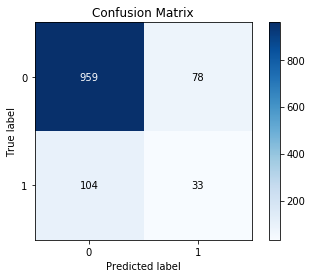

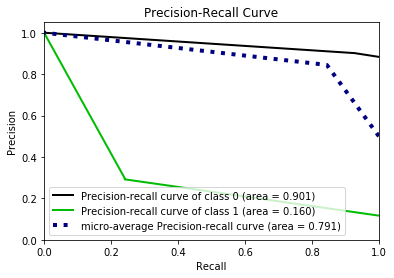

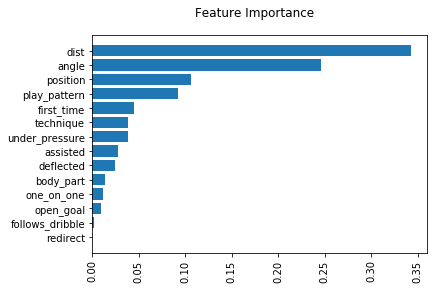

In [13]:
#TRAIN THE MODEL
#Define the algorithm we want to use for our model
clf = DecisionTreeClassifier(random_state=42)

#Train the model
clf.fit(X_train, y_train)

#Create predictions
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

#Print results
print('Predicted goals (test set): ', sum(y_pred))
print('Sum of predicted goal probabilities (aka xG): ', '{0:.2f}'.format(sum(y_pred_prob[:,1])))
print('Actual goals (test set): ', sum(y_test))
print('')
print(metrics.classification_report(y_test, y_pred))

#Plot results
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_precision_recall(y_test, y_pred_prob)

#Get feature importance
importances = pd.DataFrame({'feature':features.columns, 'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=True)

f,ax = plt.subplots()
f.suptitle('Feature Importance')
plt.barh(importances['feature'], importances['importance'])
plt.xticks(rotation='vertical')
plt.show()

In [14]:
#GOING BACK TO RIGHT BEFORE THE TRAIN MODEL STEP ABOVE
#Check class weights that a 'balanced' model would use
class_weights = compute_class_weight('balanced', np.unique(labels), labels)
print(np.unique(labels))
print(class_weights)

[0 1]
[0.5585157  4.77235772]


Predicted goals (test set):  103
Sum of predicted goal probabilities (aka xG):  102.90
Actual goals (test set):  137

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1037
           1       0.27      0.20      0.23       137

    accuracy                           0.84      1174
   macro avg       0.59      0.57      0.57      1174
weighted avg       0.83      0.84      0.83      1174



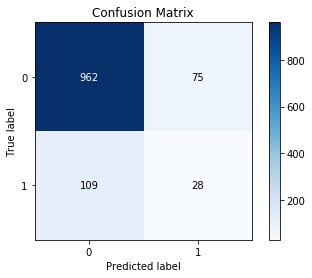

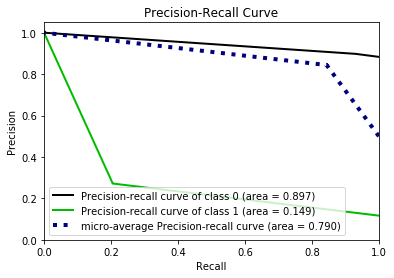

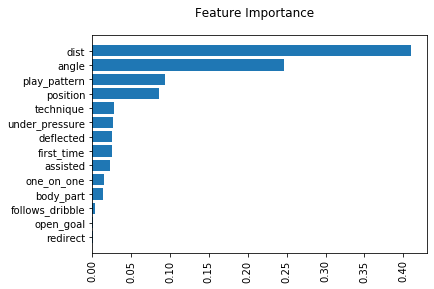

In [15]:
#RE-TRAIN THE MODEL (with MODIFIED WEIGHTINGS)
#Define the algorithm we want to use for our model
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

#Train the model
clf.fit(X_train, y_train)

#Create predictions
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

#Print results
print('Predicted goals (test set): ', sum(y_pred))
print('Sum of predicted goal probabilities (aka xG): ', '{0:.2f}'.format(sum(y_pred_prob[:,1])))
print('Actual goals (test set): ', sum(y_test))
print('')
print(metrics.classification_report(y_test, y_pred))

#Plot results
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_precision_recall(y_test, y_pred_prob)

#Get feature importance
importances = pd.DataFrame({'feature':features.columns, 'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=True)

f,ax = plt.subplots()
f.suptitle('Feature Importance')
plt.barh(importances['feature'], importances['importance'])
plt.xticks(rotation='vertical')
plt.show()

In [16]:
#SYNTHETIC SAMPLING
#Get column indices instead of names for the categorical features (required input
# input for SMOTE-NC)
# Remember in Python the first column in a dataset is at index 0, etc.
# E.g. 'play_pattern' is at index 3 in this dataset
cat_cols_ind =[]
for key in cat_cols:
    ind = features.columns.get_loc(key)
    cat_cols_ind.append(ind)
    
#Fit SMOTE-NC
smote_nc = imblearn.over_sampling.SMOTENC(categorical_features=cat_cols_ind, random_state=42)
features_resampled, labels_resampled = smote_nc.fit_resample(features, labels)

In [17]:
#Split the resampled data into a training set and a test set
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(features_resampled, labels_resampled, test_size=0.20, 
                                                   shuffle=True, random_state=42)

In [18]:
#Scale X to be between 0 and 1 (can speed up processing and help with accuracy)
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_train_re = scaler.fit_transform(X_train_re)
X_test_re = scaler.fit_transform(X_test_re)

#Note that our dataset got bigger thanks to the SMOTE-NC algo!
print(X_train_re.shape)
print(X_test_re.shape)

(8408, 14)
(2102, 14)


Predicted goals (test set):  1096
Sum of predicted goal probabilities (aka xG):  1096.13
Actual goals (test set):  1042

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1060
           1       0.78      0.82      0.80      1042

    accuracy                           0.80      2102
   macro avg       0.80      0.80      0.80      2102
weighted avg       0.80      0.80      0.80      2102



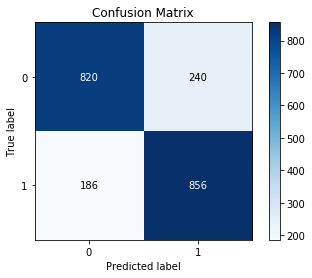

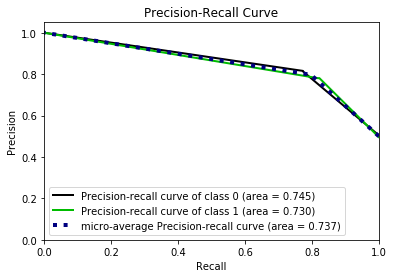

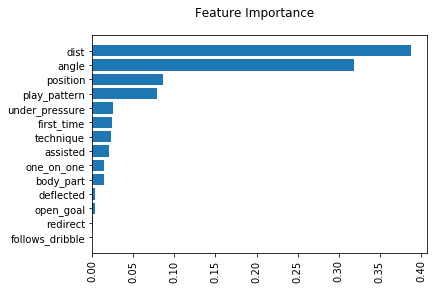

In [19]:
#Define the algorithm we want to use for our model
clf = DecisionTreeClassifier(random_state=42)

#Train the model
clf.fit(X_train_re, y_train_re)

#Create predictions
y_pred_re = clf.predict(X_test_re)
y_pred_prob_re = clf.predict_proba(X_test_re)

#Print results
print('Predicted goals (test set): ', sum(y_pred_re))
print('Sum of predicted goal probabilities (aka xG): ', '{0:.2f}'.format(sum(y_pred_prob_re[:,1])))
print('Actual goals (test set): ', sum(y_test_re))
print('')
print(metrics.classification_report(y_test_re, y_pred_re))

#Plot results
skplt.metrics.plot_confusion_matrix(y_test_re, y_pred_re)
skplt.metrics.plot_precision_recall(y_test_re, y_pred_prob_re)

#Get feature importance
importances = pd.DataFrame({'feature':features.columns, 'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=True)

f,ax = plt.subplots()
f.suptitle('Feature Importance')
plt.barh(importances['feature'], importances['importance'])
plt.xticks(rotation='vertical')
plt.show()

In [20]:
#Define a function to check cross-validation results
def check_cross_validation(features, labels, num_folds, random_state=42):
    #Scale features between 0 and 1
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(features)
    y = labels
    
    #Define the cross-validation params
    #Common values of k are 5 & 10
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_state)
    
    #Respecify decision tree here
    clf = DecisionTreeClassifier(random_state=random_state)
    
    #Calculate precision and recall inside a loop using cross-validation
    #Frist, create blank arrays to store results
    precision_0 = np.array([])
    recall_0 = np.array([])
    precision_1 = np.array([])
    recall_1 = np.array([])
    
    #Create training and test data and fit model for each fold
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        
        #Create predictions
        y_pred = clf.predict(X_test)
        
        #Calculate precision and recall
        #average=None breaks our each component
        precision_scores = metrics.precision_score(y_test, y_pred, average=None)
        recall_scores = metrics.recall_score(y_test, y_pred, average=None)
        
        #Add the results to the empty arrays
        precision_0 = np.append(precision_0, np.array(precision_scores[0]))
        precision_1 = np.append(precision_1, np.array(precision_scores[1]))
        recall_0 = np.append(recall_0, np.array(recall_scores[0]))
        recall_1 = np.append(recall_1, np.array(recall_scores[1]))
        
    #Print average ofresults from cross-validation
    print("Precision - no goal:", "{0:.4f}".format(precision_0.mean()))
    print("Recall - no goal:", "{0:.4f}".format(recall_0.mean()))
    print("Precision - goal:", "{0:.4f}".format(precision_1.mean()))
    print("Recall - goal:", "{0:.4f}".format(recall_1.mean()))
    print('')
    

In [21]:
print('Default classifier:')
check_cross_validation(features=features, labels=labels, num_folds=10)

print('SMOTE-NC classifier:')
check_cross_validation(features=features_resampled, labels=labels_resampled, num_folds=10)

Default classifier:
Precision - no goal: 0.9100
Recall - no goal: 0.8988
Precision - goal: 0.2171
Recall - goal: 0.2406

SMOTE-NC classifier:
Precision - no goal: 0.8101
Recall - no goal: 0.7911
Precision - goal: 0.7959
Recall - goal: 0.8145

